In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as linalg
import scipy.spatial as spat
import matplotlib.patches as patches
import matplotlib.colors as colors
from scipy.spatial.distance import cdist
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from functools import partial
from tqdm.contrib.concurrent import process_map
from tqdm import tqdm

In [2]:
from chern_functions import (haldane_chern_sweep, build_honeycomb, 
                            twisted_chern_sweep, find_eigvalues,
                            plot_betas, twisted_chern_c1_sweep, ABC_sections)

338


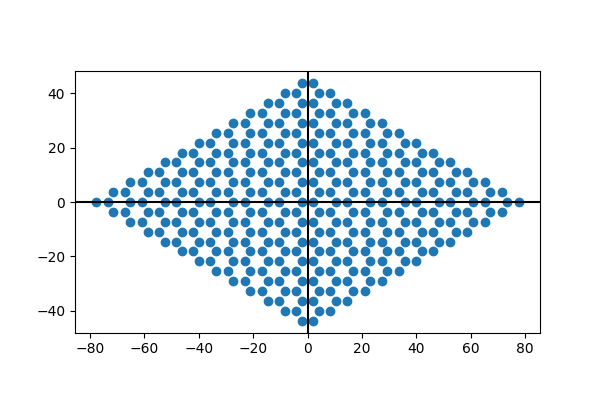

In [3]:
PITCH = 4.2
b_10_list = build_honeycomb(13, 13, PITCH)

fig_lattice_plot = plt.figure(figsize=(6,4))
ax_lattice_plot = fig_lattice_plot.add_subplot(111)
ax_lattice_plot.axhline(0, color='black')
ax_lattice_plot.axvline(0, color='black')
ax_lattice_plot.scatter(b_10_list[:,0], b_10_list[:,1])
ax_lattice_plot.set_aspect('equal')
print(len(b_10_list))

plt.show()

In [4]:
def onclick(event):
    pos.append([event.xdata,event.ydata])

pos = []

In [5]:
points_to_keep = np.where (cdist(b_10_list, np.array([[0,0]]), 'euclidean')<9*4.5, False, True)
index_to_keep = np.invert(np.any(points_to_keep, axis=1))
deformed_lattice = b_10_list[index_to_keep]

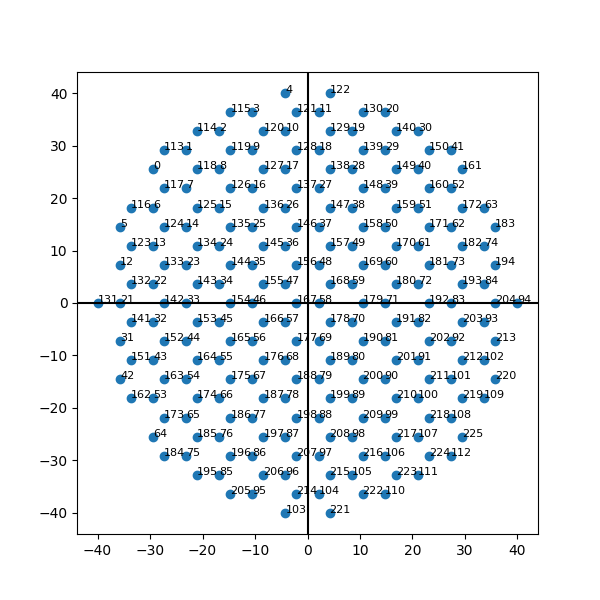

In [6]:
pos = []
fig_deformed_lattice_plot = plt.figure(figsize=(6,6))
ax_deformed_lattice_plot = fig_deformed_lattice_plot.add_subplot(111)
ax_deformed_lattice_plot.axhline(0, color='black')
ax_deformed_lattice_plot.axvline(0, color='black')
ax_deformed_lattice_plot.scatter(deformed_lattice[:,0], deformed_lattice[:,1])
ax_deformed_lattice_plot.set_aspect('equal')
for i in range(len(deformed_lattice)):
    # print(i, coord)
    ax_deformed_lattice_plot.annotate(str(i), (deformed_lattice[i,0], deformed_lattice[i,1]), fontsize=8)
# print(len(b_10_list))
fig_deformed_lattice_plot.canvas.mpl_connect('button_press_event', onclick)

plt.show()

In [7]:
pos = np.array(pos)
points_to_keep = np.where(cdist(deformed_lattice, pos, 'euclidean')>2, False, True )
index_to_keep = np.invert(np.any(points_to_keep, axis=1))
deformed_lattice= deformed_lattice[index_to_keep]
pos = list(pos)
print(len(deformed_lattice))

180


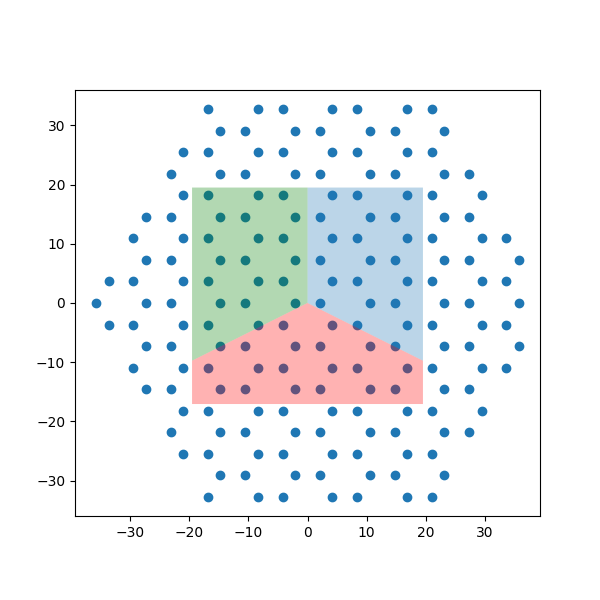

In [8]:
fig_lattice = plt.figure(figsize=(6,6))
ax_lattice = fig_lattice.add_subplot(111)

ax_lattice.scatter(deformed_lattice[:,0], deformed_lattice[:,1])
a_s, b_s, c_s = ABC_sections(19.5)
ax_lattice.add_patch(a_s)
ax_lattice.add_patch(b_s)
ax_lattice.add_patch(c_s)
ax_lattice.set_aspect('equal')
plt.show()

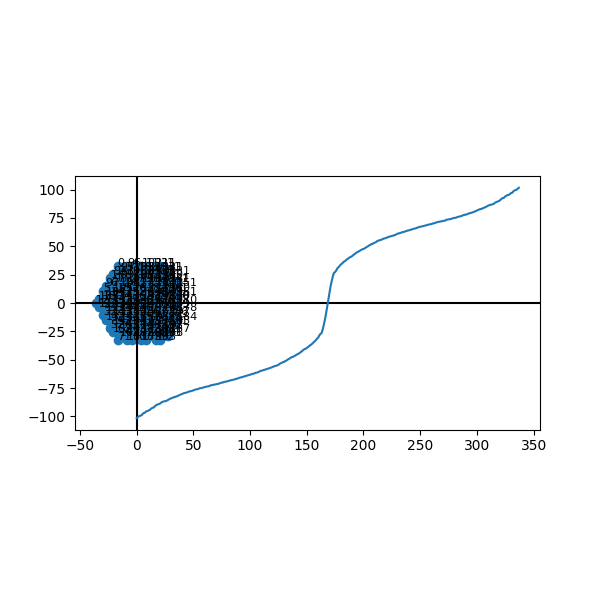

In [12]:
from chern_functions import find_eigvalues_haldane

plt.close()

eigvals, eigvecs = find_eigvalues_haldane(b_10_list, 4.2, 30, 20,0)
plt.plot(np.arange(len(eigvals)),eigvals)
plt.show()

  0%|          | 0/25 [00:00<?, ?it/s]

/opt/homebrew/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


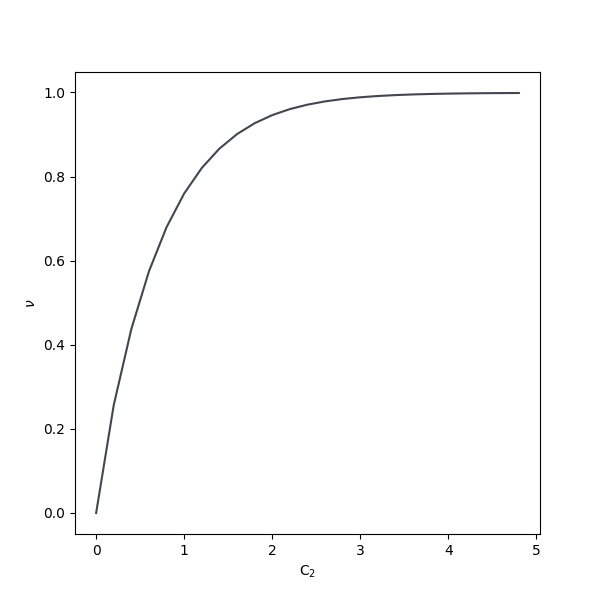

In [31]:
partial_chern_func = partial(haldane_chern_sweep, point_list=b_10_list, pitch=4.2, c1=30, onsite=0.0, starting_band=200, selection_size=27)


c2_list = np.arange(0,5,0.2)
chern_vals = process_map(partial_chern_func, c2_list )


# chern_vals = []
# for i in np.arange(0.0,10.0,1):
    # haldane_vals, haldane_vecs = find_eigvalues_haldane(b_10_list, 4.2, 30, i, 0.0)
    # chern_vals.append(real_space_chern_calc(b_10_list, haldane_vecs, 640, 38))
    
fig_chern_change = plt.figure(figsize=(6,6))
ax_chern_change = fig_chern_change.add_subplot(111)
ax_chern_change.plot(c2_list, chern_vals, color='#424651')
ax_chern_change.set_ylabel(r'$\nu$')
ax_chern_change.set_xlabel('$\mathrm{C_2}$')
fig_chern_change.savefig('haldane_model_c2.svg', dpi=300)
plt.show()

In [24]:
print(len(np.arange(500, 5500, 250)))
print(np.linspace(500,5250,20))

20
[ 500.  750. 1000. 1250. 1500. 1750. 2000. 2250. 2500. 2750. 3000. 3250.
 3500. 3750. 4000. 4250. 4500. 4750. 5000. 5250.]


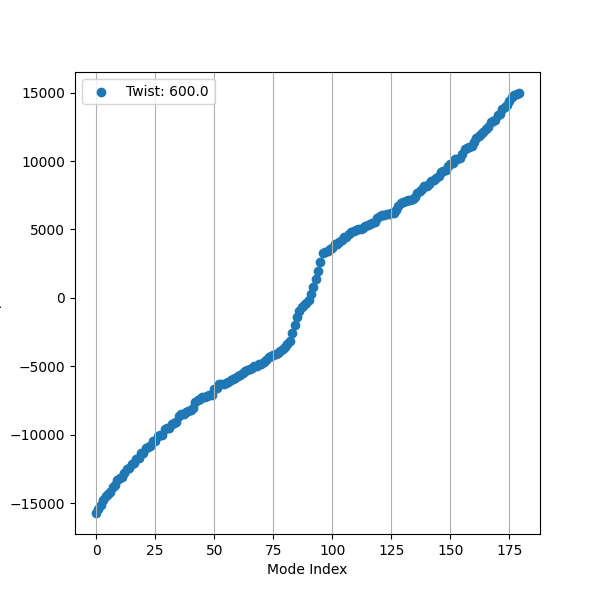

In [9]:
twist = 600
beta_straight = 5876619.5
beta_vals_1, beta_vecs_1 = find_eigvalues(deformed_lattice, 4.2, 5250, beta_straight, twist)
plot_betas(beta_vals_1, 'Twist: {:.1f}'.format(twist))

  0%|          | 0/20 [00:00<?, ?it/s]

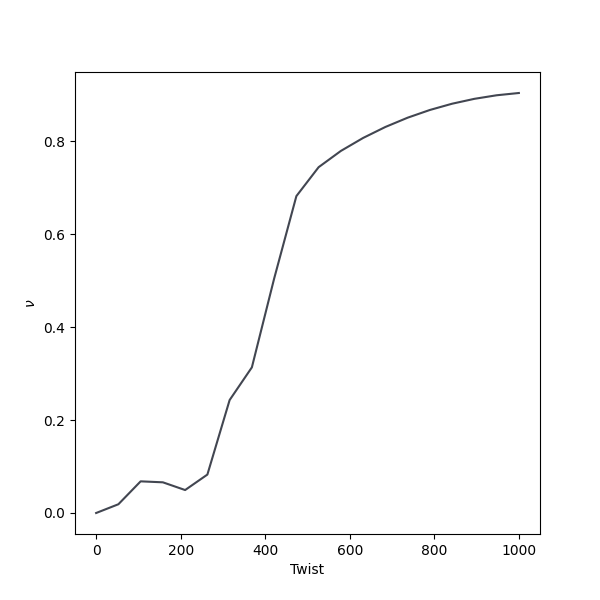

In [18]:
partial_twist_chern_func = partial(twisted_chern_sweep, point_list=deformed_lattice, pitch=4.2, c1=5250,
                                   beta_straight=beta_straight, starting_band=96, selection_size=18)


twist_list = np.linspace(0,1000,20)
chern_vals = process_map(partial_twist_chern_func, twist_list)


# chern_vals = []
# for i in np.arange(0.0,10.0,1):
    # haldane_vals, haldane_vecs = find_eigvalues_haldane(b_10_list, 4.2, 30, i, 0.0)
    # chern_vals.append(real_space_chern_calc(b_10_list, haldane_vecs, 640, 38))
    
fig_chern_change_twist = plt.figure(figsize=(6,6))
ax_chern_change_twist = fig_chern_change_twist.add_subplot(111)
ax_chern_change_twist.plot(twist_list, chern_vals, color='#424651')
ax_chern_change_twist.set_ylabel(r'$\nu$')
ax_chern_change_twist.set_xlabel('Twist')
# fig_chern_change_twist.savefig('twisted_fibre_chern.svg', dpi=300)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


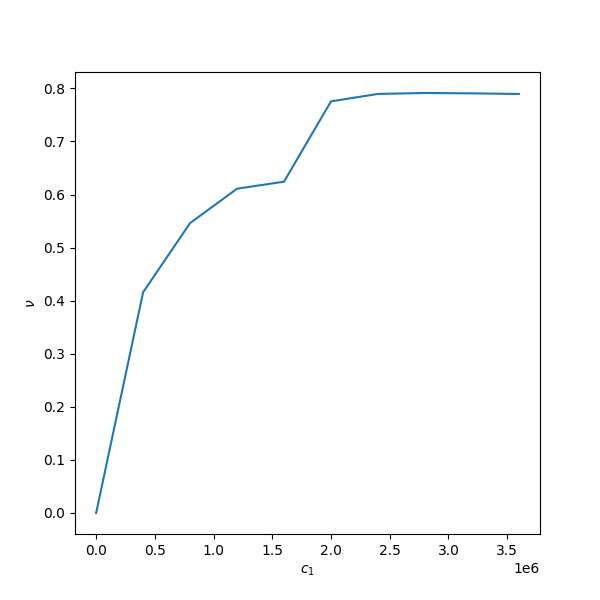

In [19]:
partial_c1_chern_func = partial(twisted_chern_c1_sweep, point_list=deformed_lattice, pitch=4.2, twist=600,
                                   beta_straight=beta_straight, starting_band=96, selection_size=18)


c1_list = np.linspace(0,6000,10)
chern_vals_c1 = process_map(partial_c1_chern_func, c1_list)


# chern_vals = []
# for i in np.arange(0.0,10.0,1):
    # haldane_vals, haldane_vecs = find_eigvalues_haldane(b_10_list, 4.2, 30, i, 0.0)
    # chern_vals.append(real_space_chern_calc(b_10_list, haldane_vecs, 640, 38))
    
fig_chern_change_c1 = plt.figure(figsize=(6,6))
ax_chern_change_c1 = fig_chern_change_c1.add_subplot(111)
ax_chern_change_c1.plot(c1_list, chern_vals_c1)
ax_chern_change_c1.set_ylabel(r'$\nu$')
ax_chern_change_c1.set_xlabel(r'$c_1$')
plt.show()

Changing c1 also changes the starting point over which I need to calculate the bands so I will instead just do a list of 10 points manually to start.


| $C_1$ | Starting point |
| --- | --- |
| 6500 | 415 |
| 6000| 414 |
| 5500 | 413 |
| 5000 | 412 |
| 4500 | 411 |
| 4000 | 410 |
| 3500 | 408 | 
| 3000 | 400 | 
| 2500 | 390 | 
| 2000 | 390 |
| 1500 | 390 | 
| 1000 | 390 | 
| 500 | 390 |



In [57]:
#c1_list = np.flip(np.arange(500, 7000, 500))
#print(c1_list)
#starting_point_list = [415, 414, 413, 412, 411, 410, 408, 400, 390, 390, 390, 390, 390]
coupling_list_2 = np.linspace(500,5250,5)
twist_list_for_heatmap = np.linspace(0.01,1000,5)

# nu_1_list = np.multiply(coupling_list_2, twist_list_for_heatmap)
# nu_2_list = np.divide(coupling_list_2, twist_list_for_heatmap)

array_for_plotting = np.zeros((len(coupling_list_2), len(twist_list_for_heatmap)))
threed_array = np.zeros((len(coupling_list_2), len(twist_list_for_heatmap),3))

for num in tqdm(range(len(coupling_list_2))):
    partial_twist_chern_func_in_loop = partial(twisted_chern_sweep, point_list=deformed_lattice, pitch=4.2, c1=coupling_list_2[num],
                                   beta_straight=beta_straight, starting_band=95, selection_size=19)#starting_point_list[num], selection_size=35)

    chern_vals_loop = process_map(partial_twist_chern_func_in_loop, twist_list_for_heatmap)
    threed_array[num,:,0] = np.real(chern_vals_loop)
    threed_array[num,:,1] = np.multiply(np.ones(len(twist_list_for_heatmap))*coupling_list_2[num],4.2)
    threed_array[num,:,2] = np.divide(np.ones(len(twist_list_for_heatmap))*coupling_list_2[num],twist_list_for_heatmap)




  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:17<01:11, 17.98s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 40%|████      | 2/5 [00:39<01:00, 20.23s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 60%|██████    | 3/5 [01:02<00:43, 21.59s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

 80%|████████  | 4/5 [01:19<00:19, 19.63s/it]

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [01:30<00:00, 18.12s/it]


[1.000000e-02 2.500075e+02 5.000050e+02 7.500025e+02 1.000000e+03]


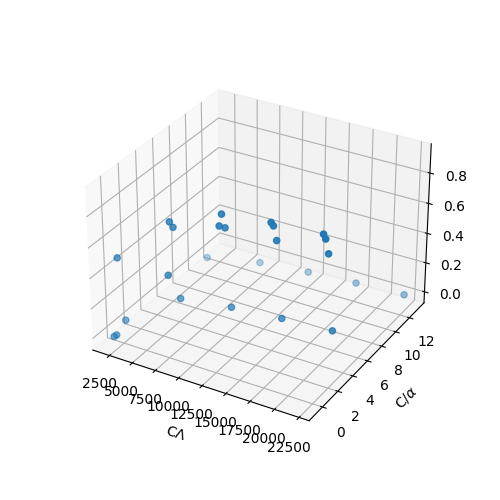

In [63]:
heatmap_fig = plt.figure(figsize=(5,5))
heatmap_ax = heatmap_fig.add_subplot(111, projection='3d')
twood_array = np.reshape(threed_array,(25,3))


# XX,YY = np.meshgrid(twood_array[:,1],twood_array[:,2])

im = heatmap_ax.scatter(twood_array[:,1], np.log(twood_array[:,2]), twood_array[:,0] )
heatmap_ax.set_xlabel(r'C$\Lambda$')
heatmap_ax.set_ylabel(r'C/$\alpha$')

#print(c1_list)
print(twist_list_for_heatmap)
# heatmap_ax.set_yticks(np.arange(20))
# heatmap_ax.set_xticks(np.arange(20))
# heatmap_ax.set_xticklabels(nu_2_list)#['{:.0f}'.format(i) for i in np.linspace(0,1000,20)])
# heatmap_ax.set_yticklabels(nu_1_list)
# heatmap_ax.set_xlabel('C1/Twist')
# heatmap_ax.set_ylabel('C1*Twist')
# heatmap_ax.invert_yaxis()
# heatmap_ax.set_aspect('equal')
# ax = plt.gca()
# cbar = ax.figure.colorbar(im, ax=ax)
# cbar.ax.set_ylabel('Chern Number', rotation=-90, va="bottom")
# plt.legend()
plt.show()

In [31]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

TypeError: set_ticks() got an unexpected keyword argument 'labels'

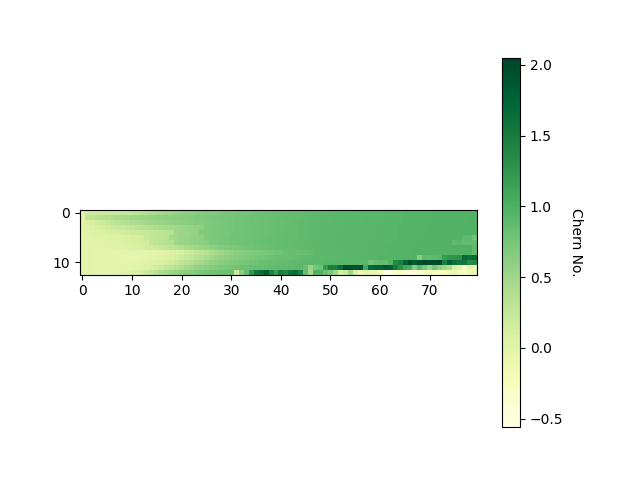

In [32]:
fig, ax = plt.subplots()

im, cbar = heatmap(array_for_plotting, twist_list_for_heatmap, c1_list, ax=ax,
                   cmap="YlGn", cbarlabel="Chern No.")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()


In [20]:
print(np.linspace(500,5000,20))

[ 500.          736.84210526  973.68421053 1210.52631579 1447.36842105
 1684.21052632 1921.05263158 2157.89473684 2394.73684211 2631.57894737
 2868.42105263 3105.26315789 3342.10526316 3578.94736842 3815.78947368
 4052.63157895 4289.47368421 4526.31578947 4763.15789474 5000.        ]


In [20]:
coupling_list_2 = np.linspace(500,5250,20)
twist_list_for_heatmap = np.linspace(0.01,1000,20)

nu_1_list = np.multiply(coupling_list_2, twist_list_for_heatmap)
nu_2_list = np.round(np.divide(coupling_list_2, twist_list_for_heatmap))
# print(nu_2_list)
# print(nu_1_list)
print(len(np.arange(np.min(nu_1_list), np.max(nu_1_list),1)))

5249995


In [49]:

# threed_array = np.zeros((len(coupling_list_2), len(twist_list_for_heatmap),3))
print(np.shape(threed_array))
print(threed_array[0,0,:])
twood_array = np.reshape(threed_array,(25,3))

print(np.shape(twood_array))
print(twood_array[0,:])

print(twood_array[:,1])
print(twood_array[:,2])

print(threed_array[:,5,1])

XX,YY = np.meshgrid(twood_array[:,1],twood_array[:,2])

(5, 5, 3)
[-3.79309517e-04  5.00000000e+00  5.00000000e+04]
(25, 3)
[-3.79309517e-04  5.00000000e+00  5.00000000e+04]
[5.00000000e+00 1.25003750e+05 2.50002500e+05 3.75001250e+05
 5.00000000e+05 1.68750000e+01 4.21887656e+05 8.43758438e+05
 1.26562922e+06 1.68750000e+06 2.87500000e+01 7.18771562e+05
 1.43751438e+06 2.15625719e+06 2.87500000e+06 4.06250000e+01
 1.01565547e+06 2.03127031e+06 3.04688516e+06 4.06250000e+06
 5.25000000e+01 1.31253938e+06 2.62502625e+06 3.93751313e+06
 5.25000000e+06]
[5.00000000e+04 1.99994000e+00 9.99990000e-01 6.66664444e-01
 5.00000000e-01 1.68750000e+05 6.74979751e+00 3.37496625e+00
 2.24999250e+00 1.68750000e+00 2.87500000e+05 1.14996550e+01
 5.74994250e+00 3.83332056e+00 2.87500000e+00 4.06250000e+05
 1.62495125e+01 8.12491875e+00 5.41664861e+00 4.06250000e+00
 5.25000000e+05 2.09993700e+01 1.04998950e+01 6.99997667e+00
 5.25000000e+00]


IndexError: index 5 is out of bounds for axis 1 with size 5

In [54]:
threed_array[1,:,1]

array([1.68750000e+01, 4.21887656e+05, 8.43758438e+05, 1.26562922e+06,
       1.68750000e+06])